In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Data importing and preparing

In [2]:
bank_data = pd.read_csv('bank-full.csv', sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
36959/45211 * 100

81.74780473778506

the feature **poutcoume** is 81% data is loss

<AxesSubplot:xlabel='poutcome', ylabel='count'>

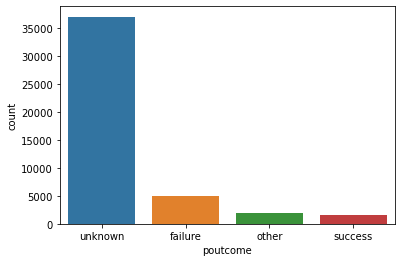

In [7]:
sns.countplot(x = bank_data.poutcome ,data = bank_data)

In [8]:
del bank_data['poutcome']

<AxesSubplot:xlabel='contact', ylabel='count'>

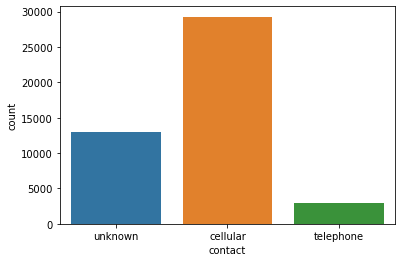

In [9]:
sns.countplot(x = bank_data.contact ,data = bank_data)

In [10]:
bank_data['contact'].groupby(bank_data['contact']).count()

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64

In [11]:
13020/45211 *100

28.798301298356595

In [12]:
del bank_data['contact']

<AxesSubplot:xlabel='job', ylabel='count'>

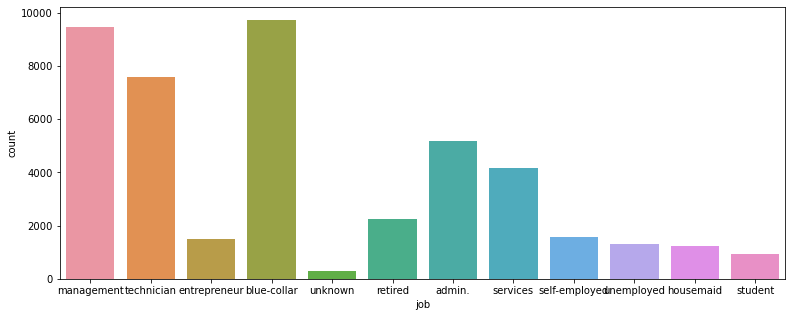

In [13]:
plt.figure(figsize=(13,5))
sns.countplot(x = bank_data.job ,data = bank_data)

In [14]:
bank_data['job'].groupby(bank_data['job']).count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [15]:
bank_data['job'].replace('unknown',np.nan,inplace=True)

In [16]:
bank_data.shape

(45211, 15)

In [17]:
bank_data.dropna(inplace=True)

In [18]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [19]:
bank_data.shape

(44923, 15)

In [20]:
bank_data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [21]:
bank_data['education'].groupby(bank_data['education']).count()

education
primary       6800
secondary    23131
tertiary     13262
unknown       1730
Name: education, dtype: int64

In [22]:
bank_data.shape

(44923, 15)

<AxesSubplot:xlabel='education', ylabel='count'>

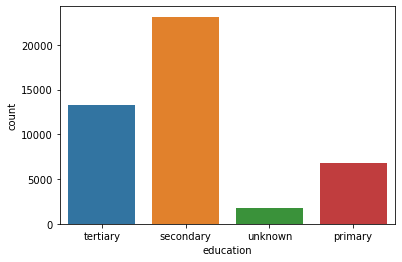

In [23]:
sns.countplot(x = bank_data.education , data = bank_data)

In [24]:
bank_data['education'].replace('unknown',np.nan,inplace=True)

In [25]:
bank_data.dropna(inplace=True)

In [26]:
bank_data.shape

(43193, 15)

### Data Preprocessing

##### using label encoding

In [27]:
bank_data_copy = bank_data.copy()

In [28]:
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no


In [29]:
bank_data_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank_data_copy['job_enc'] = le.fit_transform(bank_data_copy['job'])
bank_data_copy['marital_enc'] = le.fit_transform(bank_data_copy['marital'])
bank_data_copy['education_enc'] = le.fit_transform(bank_data_copy['education'])
bank_data_copy['default_enc'] = le.fit_transform(bank_data_copy['default'])
bank_data_copy['house_enc'] = le.fit_transform(bank_data_copy['housing'])
bank_data_copy['loan_enc'] = le.fit_transform(bank_data_copy['loan'])
bank_data_copy['month_enc'] = le.fit_transform(bank_data_copy['month'])
bank_data_copy['y_enc'] = le.fit_transform(bank_data_copy['y'])

In [35]:
bank_data_copy.drop(labels=['job','marital','default','education','housing','loan','month','y'],axis = 1, inplace=True)

In [36]:
bank_data_copy.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,house_enc,loan_enc,month_enc,y_enc
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,8,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,8,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,8,0
5,35,231,5,139,1,-1,0,4,1,2,0,1,0,8,0
6,28,447,5,217,1,-1,0,4,2,2,0,1,1,8,0


In [38]:
bank_data_copy.dtypes

age              int64
balance          int64
day              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
job_enc          int64
marital_enc      int64
education_enc    int64
default_enc      int64
house_enc        int64
loan_enc         int64
month_enc        int64
y_enc            int64
dtype: object

In [44]:
bank_data_copy.groupby(['y_enc','day'],sort=True)['day'].count()

y_enc  day
0      1       220
       2      1071
       3       866
       4      1152
       5      1591
              ... 
1      27      135
       28      131
       29      123
       30      257
       31       44
Name: day, Length: 62, dtype: int64

In [45]:
bank_data_copy.groupby(['y_enc','campaign'],sort=True)['campaign'].count()

y_enc  campaign
0      1           14311
       2           10615
       3            4690
       4            3097
       5            1567
                   ...  
1      20              1
       21              1
       24              1
       29              1
       32              1
Name: campaign, Length: 69, dtype: int64

### Model Building

In [39]:
X = bank_data_copy.drop(labels='y_enc', axis=1)
y = bank_data_copy['y_enc']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12)

In [41]:
X_train.shape, X_test.shape

((34554, 14), (8639, 14))

In [ ]:
X_train.feat

In [ ]:
for col in bank_data.columns:
    print(col)
    print(bank_data[col].unique())

In [ ]:
categorical_features=[feature for feature in bank_data.columns if ((bank_data[feature].dtypes == 'O') & (feature not in ['y']))]
categorical_features

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(bank_data[feature].unique())))

In [ ]:
bank_data['y'].unique()

In [ ]:
# bank_data['marital'].replace('unknown',np.nan,inplace=True)
# bank_data['education'].replace('unknown',np.nan,inplace=True)
# bank_data['default'].replace('unknown',np.nan,inplace=True)
# bank_data['balance'].replace('unknown',np.nan,inplace=True)
# bank_data['housing'].replace('unknown',np.nan,inplace=True)
# bank_data['loan'].replace('unknown',np.nan,inplace=True)
# bank_data['contact'].replace('unknown',np.nan,inplace=True)
# bank_data['day'].replace('unknown',np.nan,inplace=True)
# bank_data['month'].replace('unknown',np.nan,inplace=True)
# bank_data['duration'].replace('unknown',np.nan,inplace=True)
# bank_data['campaign'].replace('unknown',np.nan,inplace=True)
# bank_data['pdays'].replace('unknown',np.nan,inplace=True)
# bank_data['previous'].replace('unknown',np.nan,inplace=True)
# bank_data['poutcome'].replace('unknown',np.nan,inplace=True)

In [ ]:
# bank_data.dropna(inplace=True)

In [ ]:
pd.crosstab(index = bank_data.education, columns=bank_data.y)